**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: Becerril Balderas Joel Arturo/ Matrícula: A01497427
*   NOMBRE: Flores Amaro Arturo Alejandro/ Matrícula: A01497429
*   NOMBRE: Ocampo Nava Maria Fernanda / Matrícula: A01497420

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import os
DIR = "/content/drive/MyDrive"
os.chdir(DIR)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

En esta actividad usaremos diagnósticos de cáncer de mama acompañados de características calculadas a partir de una imagen digitalizada de una aspiración con aguja fina. El conjunto contiene 569 observaciones con 32 variables asociadas, obtenidas de diez características de valor real para cada núcleo celular:

1.   ratio: radio (media de las distancias del centro a los puntos del perímetro)
2.   texture: textura (desviación estándar de los valores de la escala de grises)
3. perimeter: perímetro
4. area: área
5. smoothness: suavidad (variación local en longitudes de radio)
6. compactness: compacidad (perímetro ^ 2 / área - 1.0)
7. concavity: concavidad (severidad de las porciones cóncavas del contorno)
8. concave_points: puntos cóncavos (número de porciones cóncavas del contorno)
9. symmetry: simetría

De estas características se calcularon para cada imagen:

1. la media
2. el error estándar
3. el "peor" (promedio de los tres valores más grandes), resultando en 30 características.
Así, para una misma observación, podemos encontrar tres valores relacionados con el radio:

1. radius_mean (columna 3)
2. radius_se (columna 13)
3. radius_worst (columna 23).

Además de estas 30 características, se incluye el id y el diagnóstico (M = maligno, B = benigno).

Con esta información se entrenará un modelo de regresión logística que prediga la malignidad del tumor (diagnosis), con base en las variables restantes.



In [52]:
#Creamos un df en donde vamos a guardar toda la información que tenemos de la base

data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [53]:
data_df.set_index('id', inplace=True)
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678




1a) Estadísticas descriptivas para todas las variables del dataframe.

In [54]:
#antes de obtener la estadistica descriptivas veo de que tipo son mis variables para poder trabajarlas acorde, observo que solo tengo 1 variable de tipo object que es la de diagnostico
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [55]:
#Obtenemos la estadistica descriptiva
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012
symmetry_mean,569.0,NaN,NaN,NaN,0.181162,0.027414,0.106,0.1619,0.1792,0.1957,0.304


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [56]:
#Para no obtener columna por columna lo que hago es obtenerlo con un for

for col in data_df.columns.to_list():
    print('Variable {}: {}\n'.format(col, data_df[col].unique()[:5]))

Variable diagnosis: ['M' 'B']

Variable radius_mean: [17.99 20.57 19.69 11.42 20.29]

Variable texture_mean: [10.38 17.77 21.25 20.38 14.34]

Variable perimeter_mean: [122.8  132.9  130.    77.58 135.1 ]

Variable area_mean: [1001.  1326.  1203.   386.1 1297. ]

Variable smoothness_mean: [0.1184  0.08474 0.1096  0.1425  0.1003 ]

Variable compactness_mean: [0.2776  0.07864 0.1599  0.2839  0.1328 ]

Variable concavity_mean: [0.3001 0.0869 0.1974 0.2414 0.198 ]

Variable concave points_mean: [0.1471  0.07017 0.1279  0.1052  0.1043 ]

Variable symmetry_mean: [0.2419 0.1812 0.2069 0.2597 0.1809]

Variable fractal_dimension_mean: [0.07871 0.05667 0.05999 0.09744 0.05883]

Variable radius_se: [1.095  0.5435 0.7456 0.4956 0.7572]

Variable texture_se: [0.9053 0.7339 0.7869 1.156  0.7813]

Variable perimeter_se: [8.589 3.398 4.585 3.445 5.438]

Variable area_se: [153.4   74.08  94.03  27.23  94.44]

Variable smoothness_se: [0.006399 0.005225 0.00615  0.00911  0.01149 ]

Variable compactness_se

1c) Búsqueda de valores faltantes.

In [57]:
#Obtengo la suma de valores faltantes para cada variable

data_df.isna().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

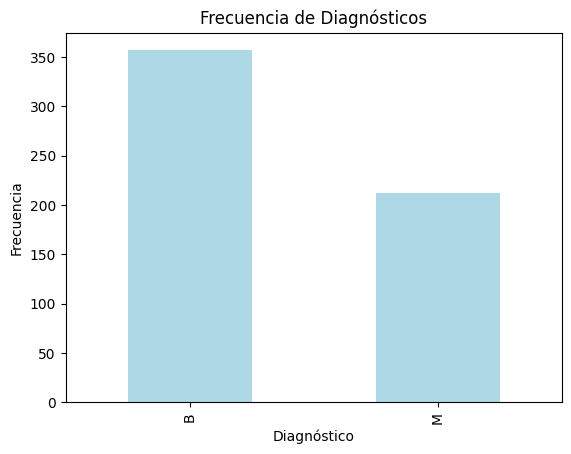

In [58]:
# pedimos que se cuenten los valores y que sea por tipo de barra
data_df['diagnosis'].value_counts().plot(kind='bar', color='lightblue')
#pedimos que se le ponga el titulo
plt.title('Frecuencia de Diagnósticos')
#ponemos el titulo del eje X
plt.xlabel('Diagnóstico')
#ponemos el titulo del eje Y
plt.ylabel('Frecuencia')
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

Text(0.5, 1.0, 'Mapa de Calor de la Matriz de Correlación')

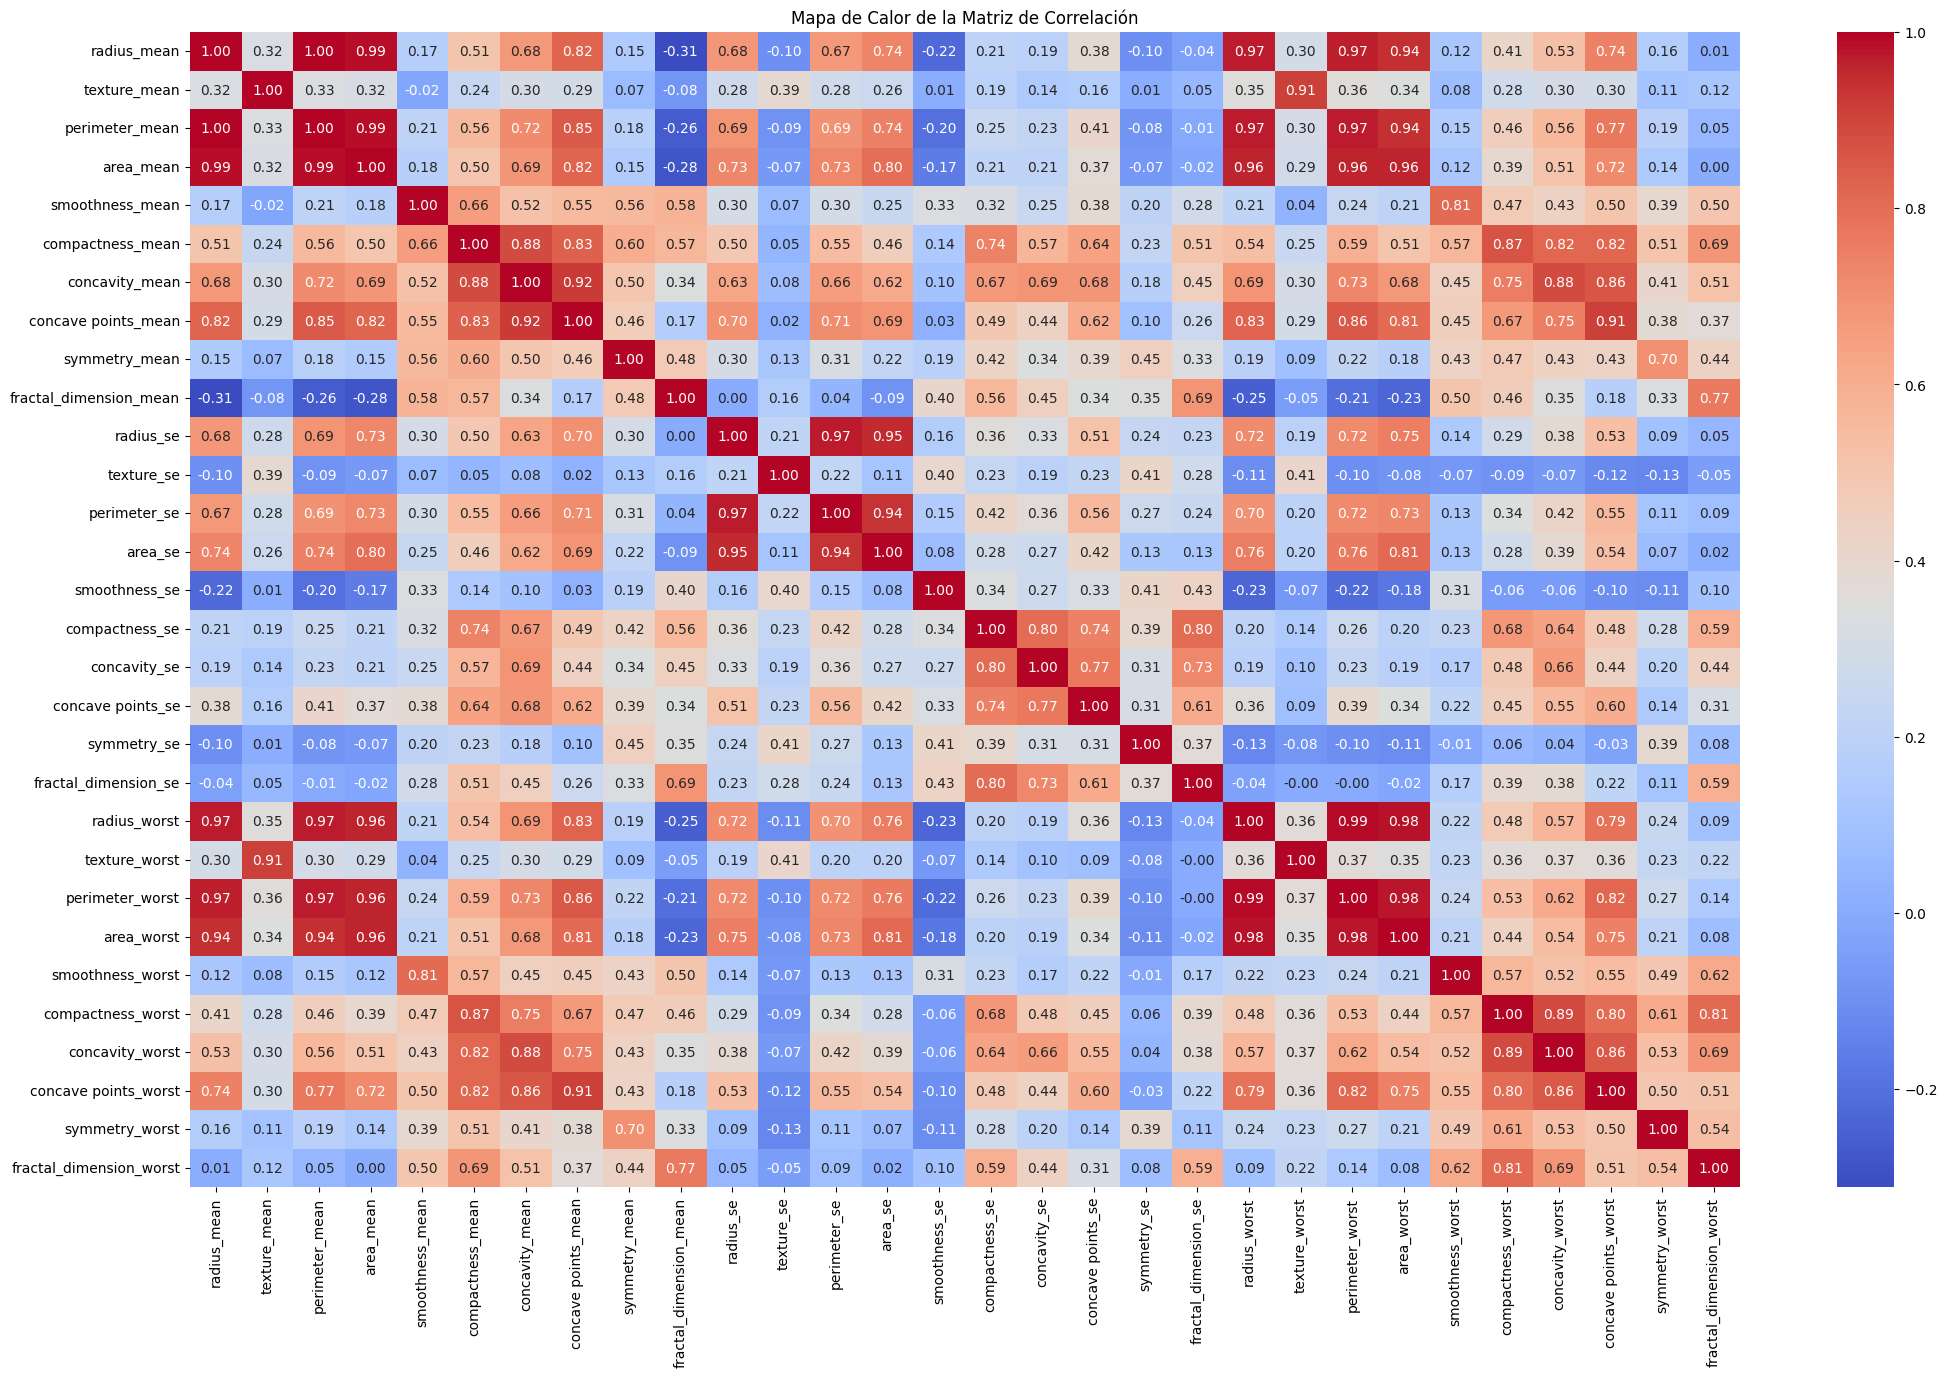

In [59]:
#le damos el tamaño que queremos al cuadro en el que haremos el mapa de calor
plt.figure(figsize=(25, 15))
#creamos el mapa de calor
# con data_df.corr(numeric_only=True) creamos la matriz de correlacion de todas las columnas y lo pnemos a dos decimales
sns.heatmap(data_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación')

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

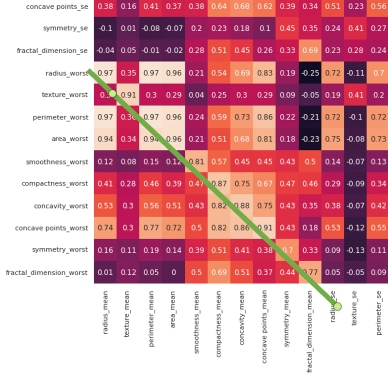

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [60]:
# identificamos las columnas que terminan con '_worst'
cols_to_drop = [col for col in data_df.columns if col.endswith('_worst')]

# Eliminamos las columnas que terminan con worst
data_df = data_df.drop(columns=cols_to_drop)

data_df.head()




,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




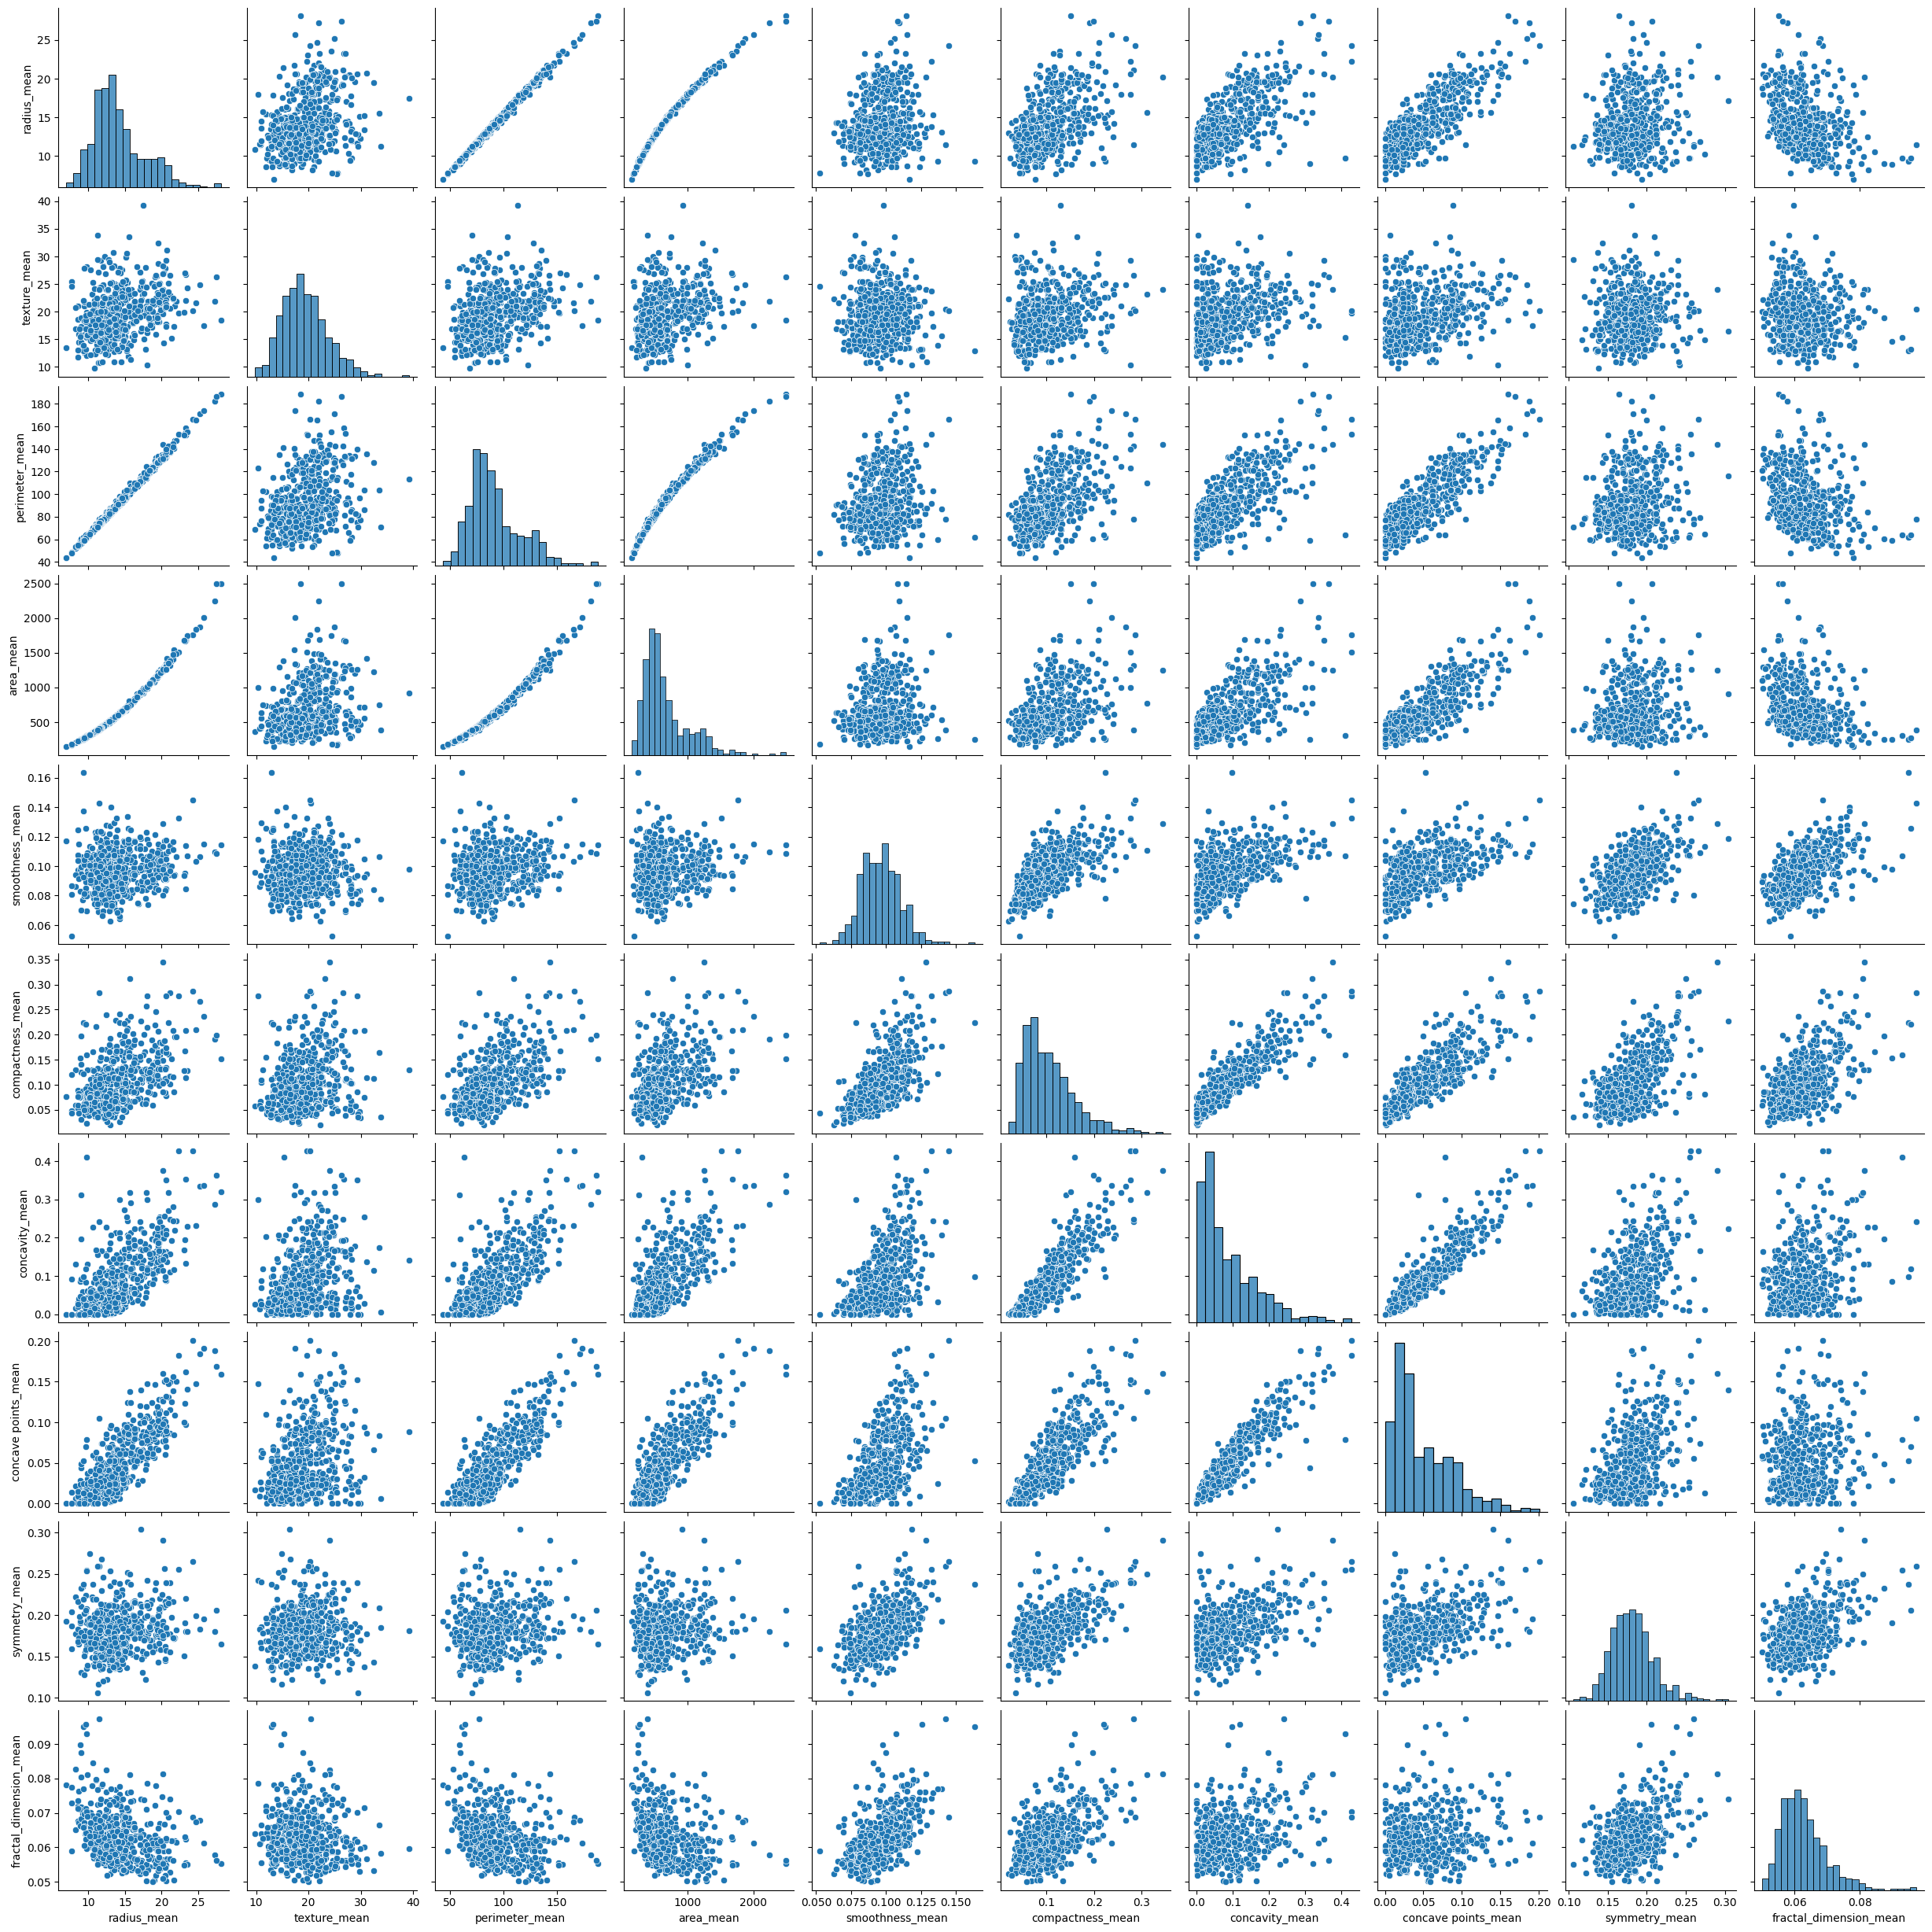

In [61]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


Text(0.5, 1.0, 'Mapa de Calor de la Matriz de Correlación')

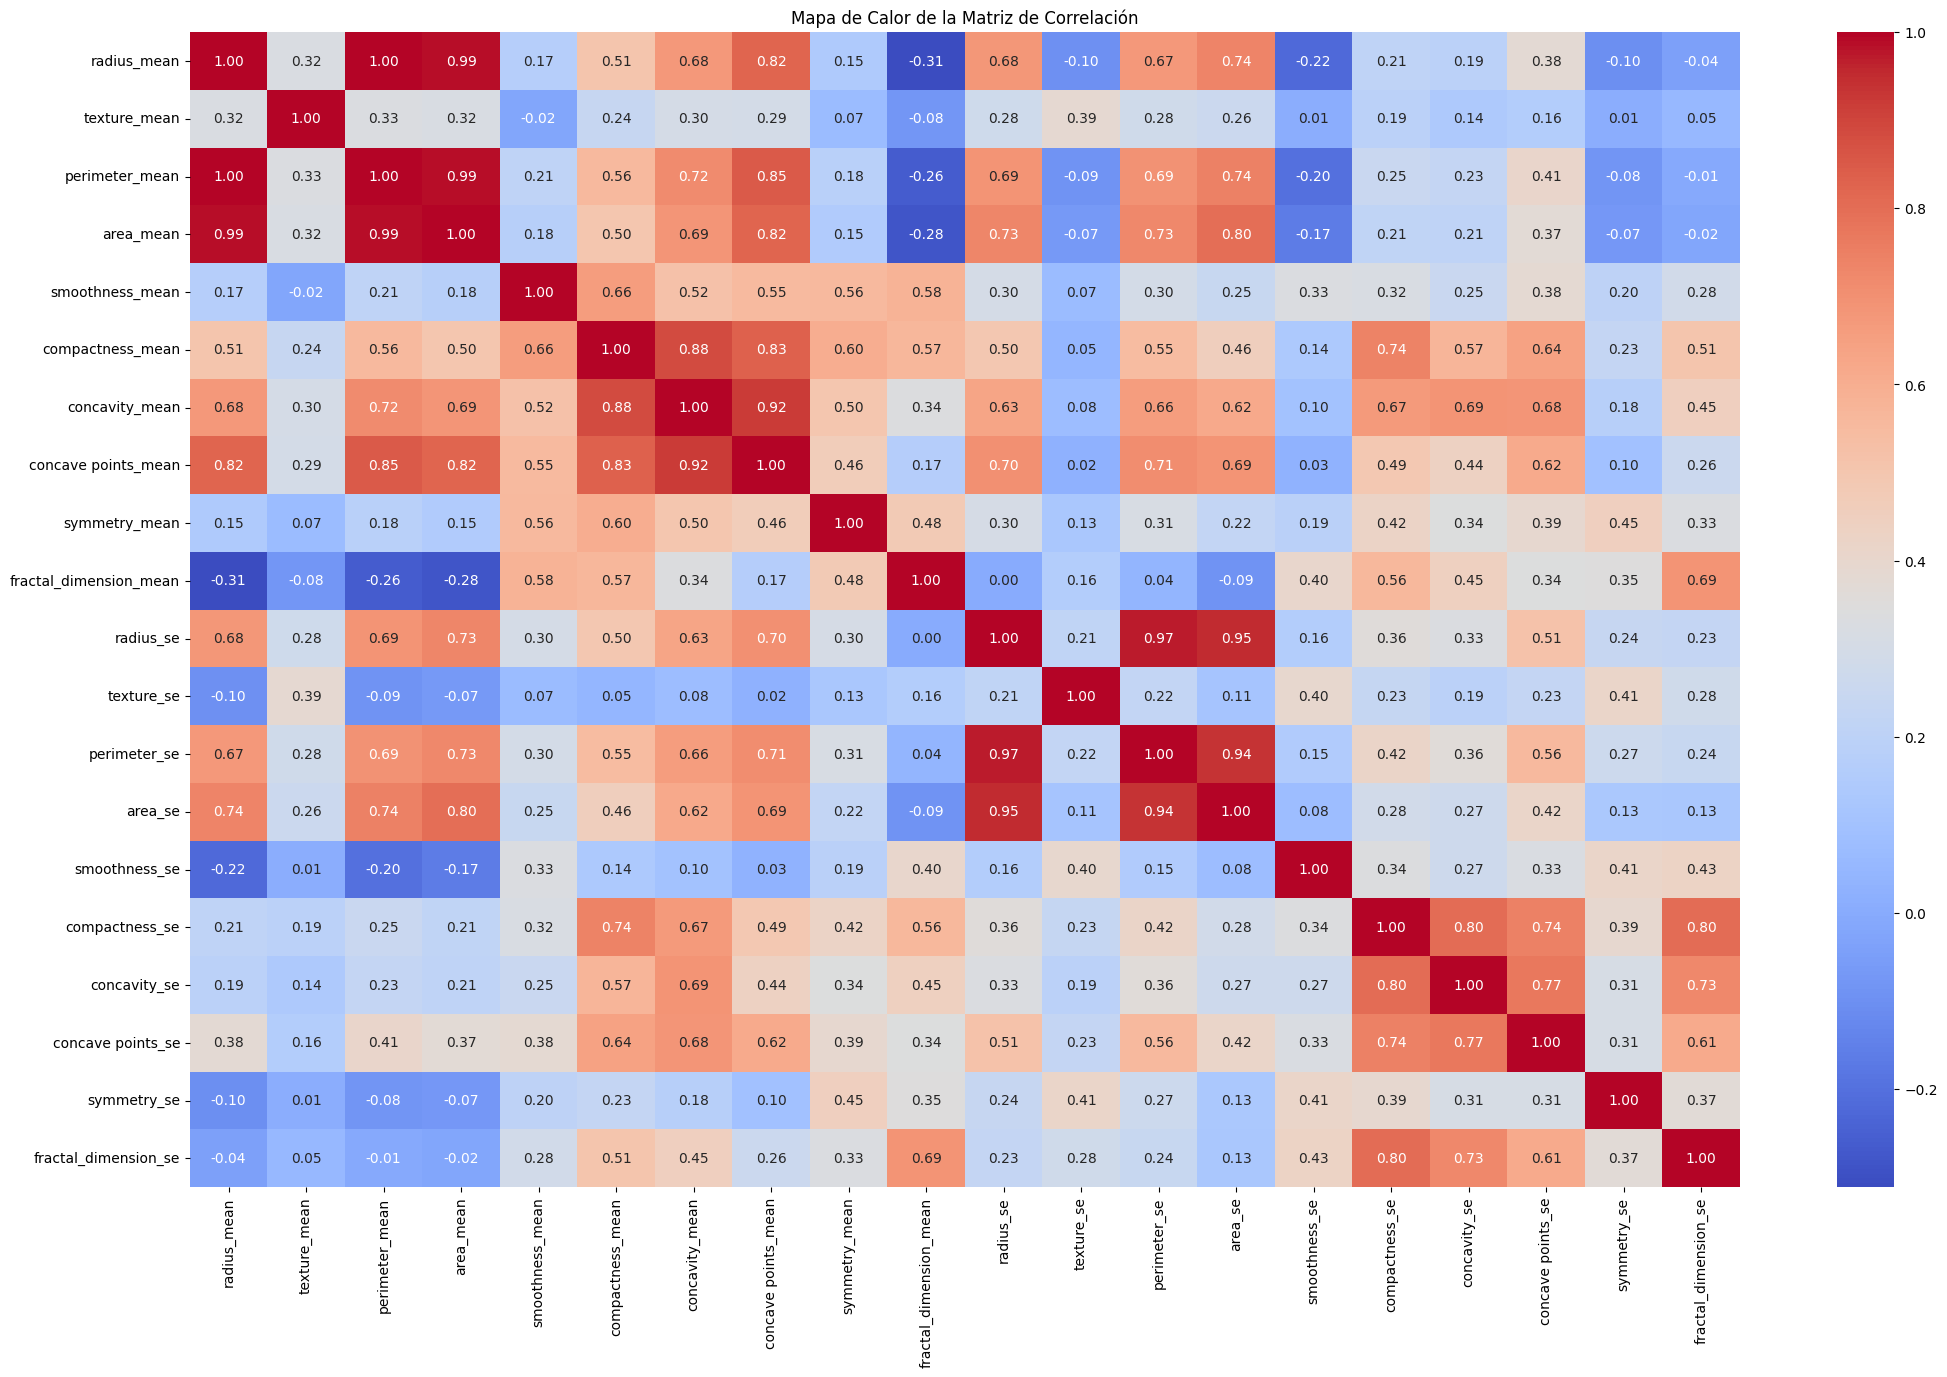

In [62]:
#le damos el tamaño que queremos al cuadro en el que haremos el mapa de calor
plt.figure(figsize=(25, 15))
#creamos el mapa de calor
# con data_df.corr(numeric_only=True) creamos la matriz de correlacion de todas las columnas y lo pnemos a dos decimales
sns.heatmap(data_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación')

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [63]:
#identificamos las columnas que vamos a eliminar
cols_to_drop = [ 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
    'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']

#elimino las columnas identificadas

data_df=data_df.drop(columns=cols_to_drop)

data_df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,
842302,M,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
842517,M,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
84300903,M,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
84348301,M,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
84358402,M,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


In [64]:
#obtengo la información de las columnas restantes

data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

Columnas con sesgo positivo (skew > 1): ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


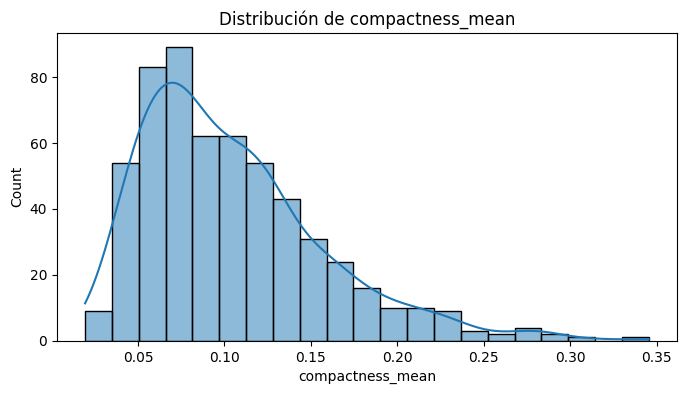

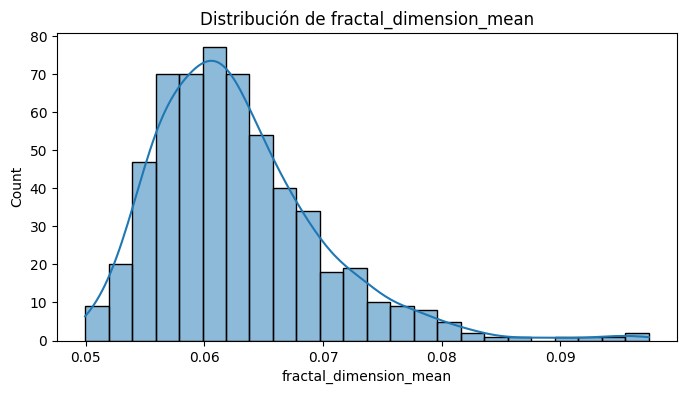

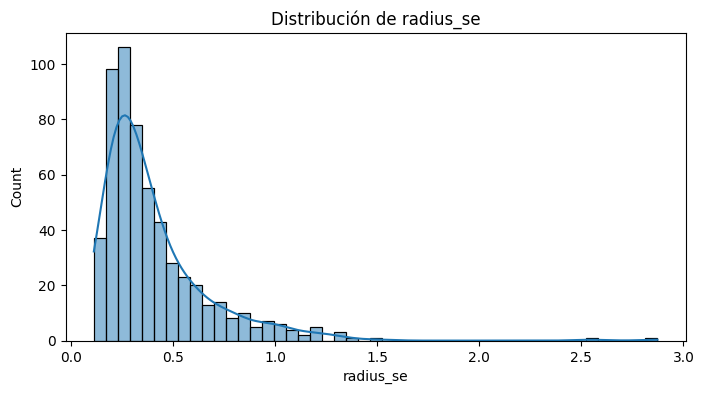

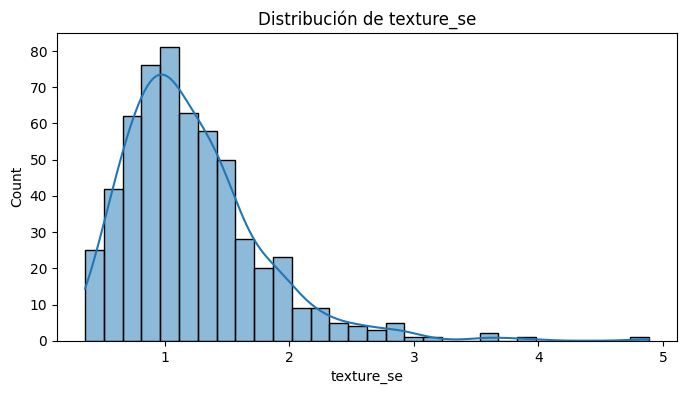

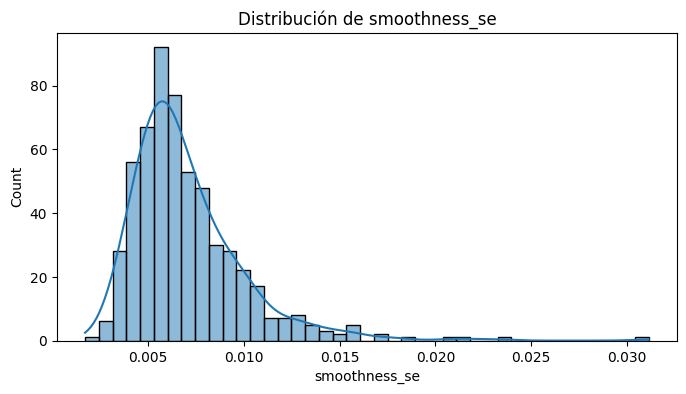

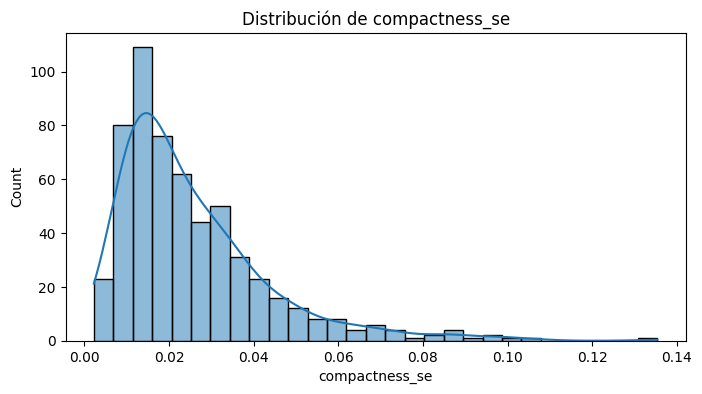

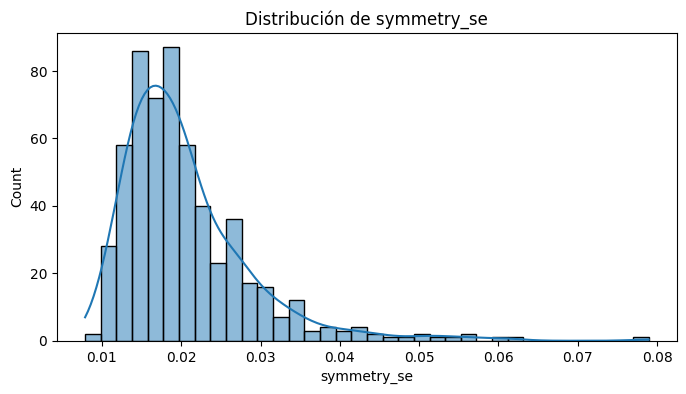

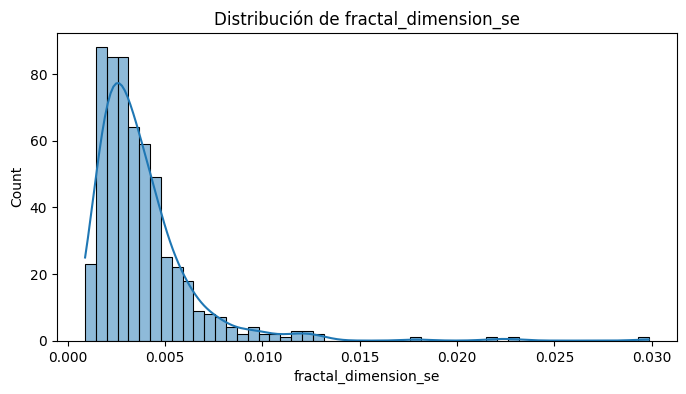

In [65]:
#Calcula el sesgo de las variables numericas
skewed_cols = data_df.skew(numeric_only=True)
skew_cols = skewed_cols[skewed_cols > 1].index.tolist()

print("Columnas con sesgo positivo (skew > 1):", skew_cols)

for col in skew_cols:
   plt.figure(figsize=(8, 4))
   sns.histplot(data_df[col], kde=True)
   plt.title(f'Distribución de {col}')
   plt.show()

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


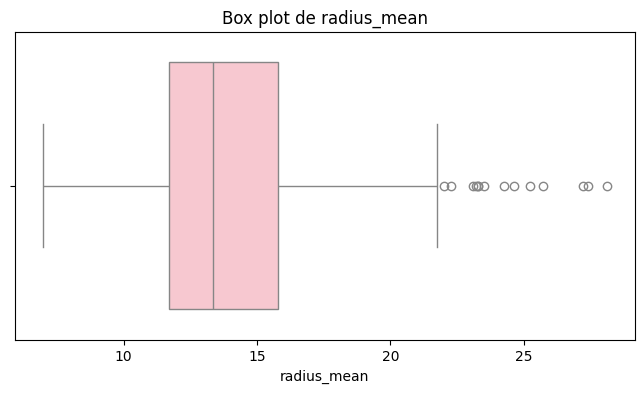

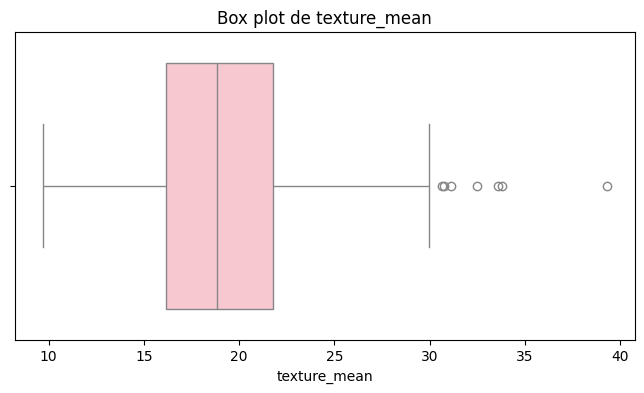

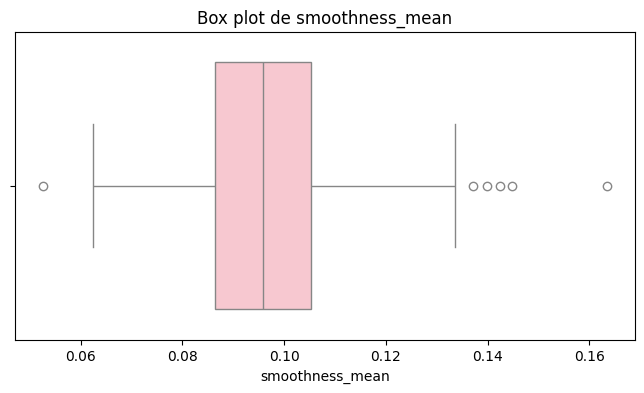

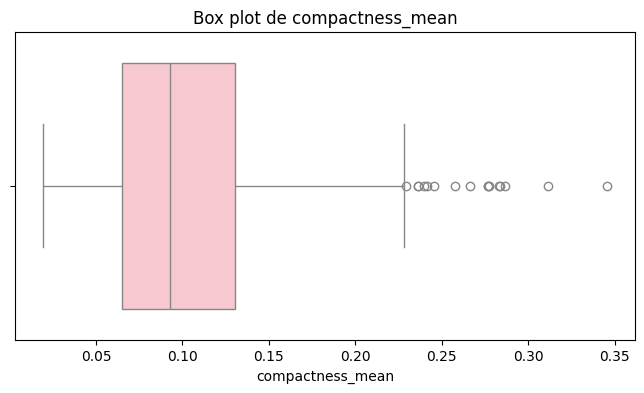

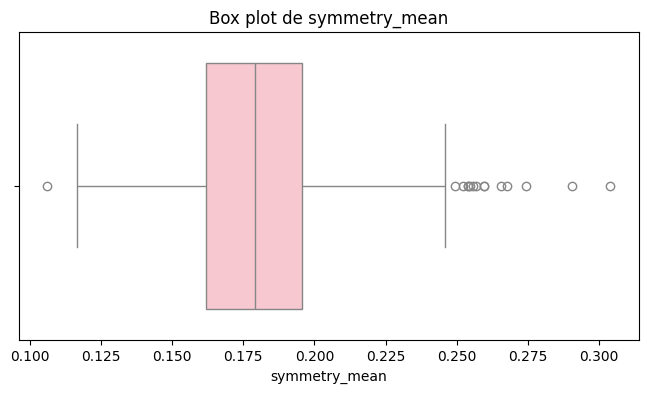

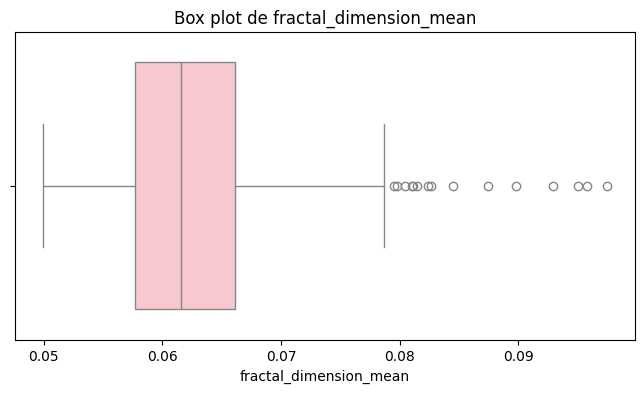

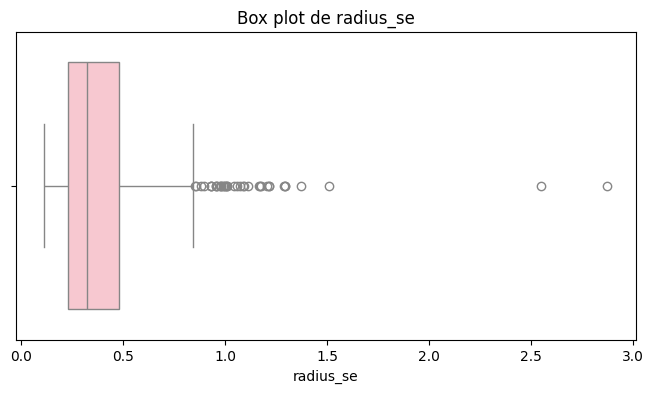

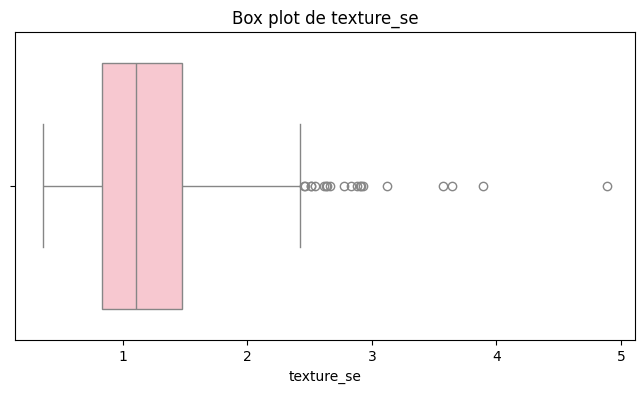

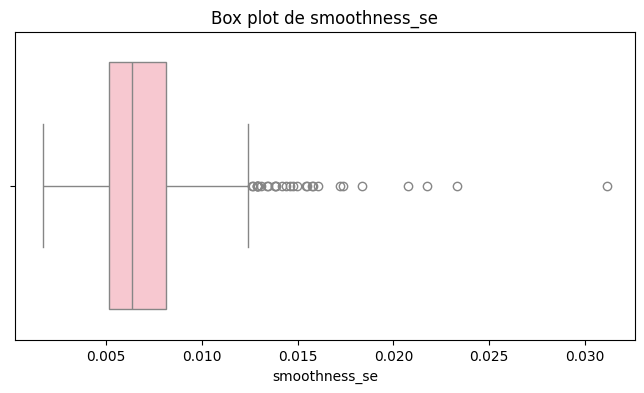

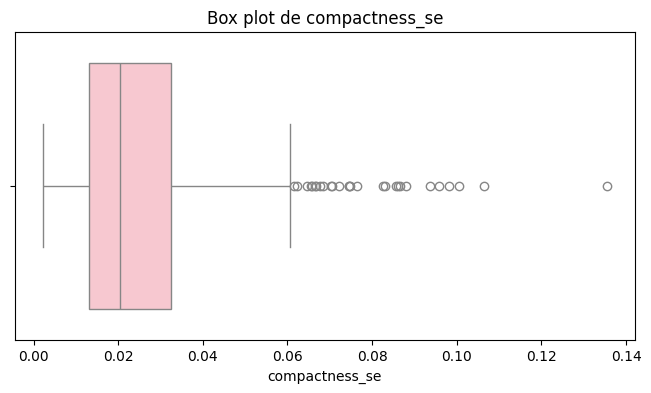

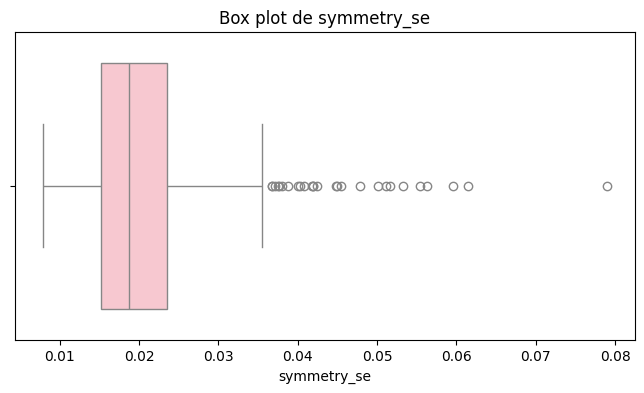

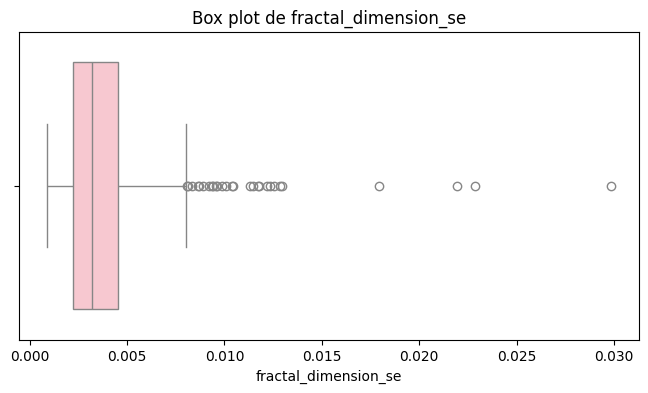

Columnas que no están en el intervalo [0, 1]: ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


In [66]:

scale_cols = []
for col in data_df.columns:
  # Seleccionamos  las columnas numericas para el box plots
    if data_df[col].dtype in [np.float64, np.int64]:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data_df[col], color ='Pink')
        plt.title(f'Box plot de {col}')
        plt.show()

        # Checamos si la variable esta fuera del [0, 1]
        min_val = data_df[col].min()
        max_val = data_df[col].max()
        if not (min_val >= 0 and max_val <= 1):
            scale_cols.append(col)

print("Columnas que no están en el intervalo [0, 1]:", scale_cols)





Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [67]:
#leemos el archivo nuevamente
data_df=pd.read_csv('data.csv')
# hacemos que id sea el indice
data_df.set_index('id', inplace=True)
data_df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [68]:
#separamos las variables del dataframe:
#en X los predictores y en y la variable de respuesta o salida (diagnosis)
X=data_df.drop('diagnosis', axis=1)
y=data_df['diagnosis']

# Dividimos el conjunto en entrenamiento y prueba (80:20)
#considerando el parámetro random_state con el valor de 1.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Lists de columnas que se van a eliminar
cols_to_drop_preprocessing = [col for col in X_train.columns if col.endswith('_worst')] + \
                             ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
                              'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']

# Creamos las columnas a transformar
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_correlated', 'drop', cols_to_drop_preprocessing)
    ],
    remainder='passthrough' # Keep the remaining columns
)

print("Columnas a eliminar en el transformador:", cols_to_drop_preprocessing)

Columnas a eliminar en el transformador: ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [70]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score

# Make predictions on the test set
y_pred = pipeline.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])
recall = recall_score(y_test, y_pred, pos_label='M')
precision = precision_score(y_test, y_pred, pos_label='M')
accuracy = accuracy_score(y_test, y_pred)

print("Matriz de Confusión:\n", conf_matrix)
print("\nRecall (Clase M):", recall)
print("Precision (Clase M):", precision)
print("Accuracy:", accuracy)

Matriz de Confusión:
 [[68  4]
 [10 32]]

Recall (Clase M): 0.7619047619047619
Precision (Clase M): 0.8888888888888888
Accuracy: 0.8771929824561403


In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
import numpy as np

# Creamos las columnas transformadas
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_correlated', 'drop', cols_to_drop_preprocessing),
        ('sqrt_transform', FunctionTransformer(func=np.sqrt, validate=False), skew_cols),
        ('minmax_scale', MinMaxScaler(), scale_cols)
    ],
    remainder='passthrough' # mantenemos las columnas remaining
)

print("Transformador 'preprocessing' modificado para incluir raíz cuadrada y escalamiento MinMax.")

Transformador 'preprocessing' modificado para incluir raíz cuadrada y escalamiento MinMax.


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score

# Creamos the logistic regression model for logr_model2
logr_model2 = LogisticRegression(random_state=1)

# Creamos a pipeline with the modified preprocessing transformer y the logistic regression model
pipeline2 = Pipeline(steps=[('preprocessing', preprocessing),
                            ('classifier', logr_model2)])

# entrenamos el modelo con los datos de entrenamiento
pipeline2.fit(X_train, y_train)

print("Modelo logr_model2 entrenado exitosamente.")

# hacemos la prediccion
y_pred2 = pipeline2.predict(X_test)

# Calculamos las metricas de evaluación de logr_model2
conf_matrix2 = confusion_matrix(y_test, y_pred2, labels=['B', 'M'])
recall2 = recall_score(y_test, y_pred2, pos_label='M')
precision2 = precision_score(y_test, y_pred2, pos_label='M')
accuracy2 = accuracy_score(y_test, y_pred2)

print("\nResultados de la evaluación para logr_model2:")
print("Matriz de Confusión:\n", conf_matrix2)
print("\nRecall (Clase M):", recall2)
print("Precision (Clase M):", precision2)
print("Accuracy:", accuracy2)

Modelo logr_model2 entrenado exitosamente.

Resultados de la evaluación para logr_model2:
Matriz de Confusión:
 [[72  0]
 [11 31]]

Recall (Clase M): 0.7380952380952381
Precision (Clase M): 1.0
Accuracy: 0.9035087719298246


6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [73]:
# Define the logistic regression model (same as before)
logr2 = LogisticRegression(solver='liblinear', random_state=1)
logr_model2 = Pipeline(steps=[('preprocessor', preprocessing),
                              ('classifier', logr2)])

# Train the model
logr_model2.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred2 = logr_model2.predict(X_test)

# Calculate metrics
accuracy2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2, labels=['B', 'M'])
recall2 = recall_score(y_test, y_pred2, pos_label='M')
precision2 = precision_score(y_test, y_pred2, pos_label='M')

print(f"\nResultados prueba para logr_model2:")
print(f"Accuracy: {accuracy2:.4f}")
print(f"Matriz de Confusión:\n{conf_matrix2}")
print(f"Recall (Clase Positiva 'M'): {recall2:.4f}")
print(f"Precision (Clase Positiva 'M'): {precision2:.4f}")


Resultados prueba para logr_model2:
Accuracy: 0.9035
Matriz de Confusión:
[[72  0]
 [11 31]]
Recall (Clase Positiva 'M'): 0.7381
Precision (Clase Positiva 'M'): 1.0000


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [74]:
from sklearn.preprocessing import StandardScaler

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

print("X ha sido escalado usando StandardScaler.")

X ha sido escalado usando StandardScaler.


8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

Número de componentes que explican el 99% de la varianza: 17


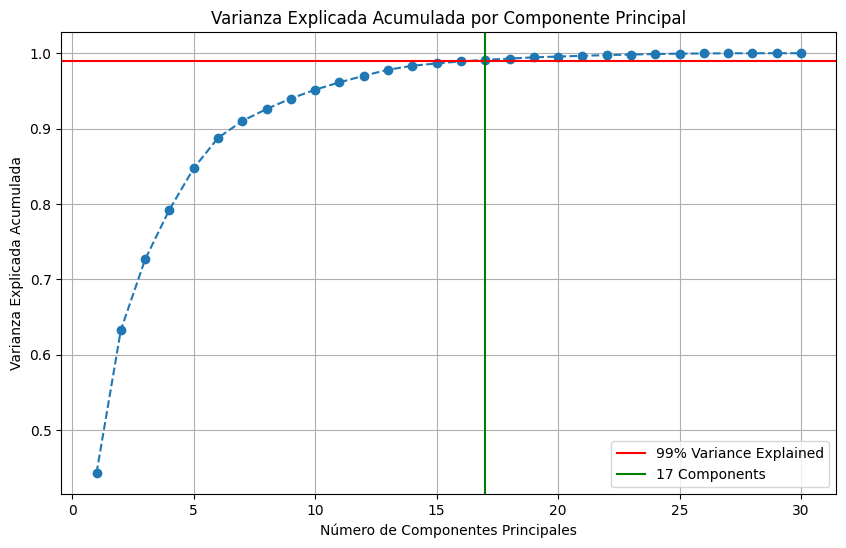

In [75]:
from sklearn.decomposition import PCA

pca = PCA()

#se aplica el análisis de Componentes Principales (PCA) a los datos escalados
pca.fit(X_scaled)

# rreglo donde cada elemento en la posición i representa la proporción total de varianza
#explicada por los primeros i+1 componentes principales.
cumulativevar = np.cumsum(pca.explained_variance_ratio_)

# encontramos el número de componentes que explican al menos el 99% de varianza
n = np.argmax(cumulativevar >= 0.99) + 1

print(f"Número de componentes que explican el 99% de la varianza: {n}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.99, color='r', linestyle='-', label='99% Variance Explained')
plt.axvline(x=n_components_99, color='g', linestyle='-', label=f'{n_components_99} Components')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.legend()
plt.show()

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score

# Instantiate the StandardScaler
scaler = StandardScaler()

# Iniciamos PCA con el numero de componentes que explican el  99% varianza

pca = PCA(n_components=n)
logr = LogisticRegression(random_state=1)

# Creamos los pipeline
logr_model3 = Pipeline(steps=[('scaler', scaler),
                              ('pca', pca),
                              ('classifier', logr)])

# entrenamos el modelo usando los datos de entrenamiento
logr_model3.fit(X_train, y_train)

print("Modelo logr_model3 (con PCA) entrenado exitosamente.")

# Make predictions on the test set
y_pred3 = logr_model3.predict(X_test)

# Calculate evaluation metrics for logr_model3
conf_matrix3 = confusion_matrix(y_test, y_pred3, labels=['B', 'M'])
recall3 = recall_score(y_test, y_pred3, pos_label='M')








n_components_determined = n_components_99 # Use the variable from the previous step

# Define the logistic regression model (same as before)
logr3 = LogisticRegression(solver='liblinear', random_state=1)

# Create the pipeline including Standard Scaling, PCA, and Logistic Regression
logr_model3 = Pipeline(steps=[('scaler', StandardScaler()), # Step 1: Scale the data
                              ('pca', PCA(n_components=n_components_determined)), # Step 2: Apply PCA with determined components
                              ('classifier', logr3)]) # Step 3: Train Logistic Regression

# Train the pipeline model using the training set
logr_model3.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred3 = logr_model3.predict(X_test)

# Calculate metrics
accuracy3 = accuracy_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3, labels=['B', 'M'])
recall3 = recall_score(y_test, y_pred3, pos_label='M')
precision3 = precision_score(y_test, y_pred3, pos_label='M')

print(f"\nResultados prueba para logr_model3 (PCA):")
print(f"Accuracy: {accuracy3:.4f}")
print(f"Matriz de Confusión:\n{conf_matrix3}")
print(f"Recall (Clase Positiva 'M'): {recall3:.4f}")
print(f"Precision (Clase Positiva 'M'): {precision3:.4f}")

Modelo logr_model3 (con PCA) entrenado exitosamente.

Resultados prueba para logr_model3 (PCA):
Accuracy: 0.9825
Matriz de Confusión:
[[72  0]
 [ 2 40]]
Recall (Clase Positiva 'M'): 0.9524
Precision (Clase Positiva 'M'): 1.0000


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

Sensibilidad es una métrica crucial, por que la detección temprana de la enfermedad es muy importante, Mide la capacidad del modelo para identificar correctamente todos los casos positivos reales (malignos). En otras palabras, de todos los tumores que realmente son malignos, ¿cuántos detectó correctamente nuestro modelo? Un alto recall significa que minimizamos los falsos negativos (pacientes con cáncer que el modelo clasifica erróneamente como benignos). En un diagnóstico médico, un falso negativo puede tener consecuencias graves (retraso en el tratamiento, empeoramiento de la condición).

La presición Mide la proporción de predicciones positivas que son realmente correctas. De todos los tumores que el modelo predijo como malignos, ¿cuántos eran realmente malignos? Una alta precisión significa que minimizamos los falsos positivos (pacientes sanos que el modelo clasifica erróneamente como enfermos).

La exactitud mide la proporción total de predicciones correctas (tanto positivos como negativos). Es una métrica general, pero puede ser engañosa si las clases están desbalanceadas (por ejemplo, si hay muchos más casos benignos que malignos).

¿Cuál es la métrica más importante?

La metrica mas importante es Recall porque es preferible tener algunos falsos positivos (pacientes sanos que pasan por más pruebas) que un solo falso negativo (un paciente enfermo que no recibe el tratamiento necesario).

¿Cómo cambiar el threshold?

Los modelos de clasificación como la Regresión Logística calculan una probabilidad de que una observación pertenezca a la clase positiva (en este caso, 'M' de maligno). Por defecto, si esta probabilidad es >= 0.5, el modelo clasifica la observación como positiva ('M'), y si es < 0.5, la clasifica como negativa ('B'). Este valor de 0.5 es el threshold por defecto.

Para cambiar el balance entre falsos positivos y falsos negativos, puedes ajustar este threshold:

Para reducir falsos negativos debemos disminuir el threshold (por ejemplo, a 0.4 o 0.3). Al reducir el threshold, el modelo será más sensible a clasificar una observación como 'M'. Esto atrapará más casos malignos reales (aumentando el Recall), pero también es probable que clasifique incorrectamente más casos benignos como malignos (aumentando los falsos positivos y disminuyendo la Precision).
Para aumentar la Precision (reducir falsos positivos): Debes aumentar el threshold (por ejemplo, a 0.6 o 0.7). Al aumentar el threshold, el modelo será más estricto para clasificar una observación como 'M'. Esto reducirá el número de falsos positivos (aumentando la Precision), pero es probable que pase por alto algunos casos malignos reales (aumentando los falsos negativos y disminuyendo el Recall).
¿Por qué cambiar el threshold?

Cambiar el threshold permite optimizar el modelo para el objetivo específico del problema. En un diagnóstico de cáncer, donde los falsos negativos son muy costosos, a menudo se prefiere un threshold más bajo para priorizar un alto Recall, incluso si eso significa aceptar una menor Precision y generar más falsos positivos que requerirán pruebas de seguimiento.

[texto del vínculo](https://)

En un modelo de diagnóstico médico como este, la métrica más importante a considerar depende mucho del contexto y las consecuencias de los falsos positivos y falsos negativos. Sin embargo, a menudo **Recall (Sensibilidad)** es una métrica crucial, especialmente cuando la detección temprana de la enfermedad (malignidad en este caso) es primordial.

Aquí te explico por qué y cómo podrías ajustar el *threshold*:

*   **Recall (Sensibilidad):** Mide la capacidad del modelo para identificar correctamente todos los casos positivos reales (malignos). En otras palabras, de todos los tumores que realmente son malignos, ¿cuántos detectó correctamente nuestro modelo? Un alto recall significa que minimizamos los **falsos negativos** (pacientes con cáncer que el modelo clasifica erróneamente como benignos). En un diagnóstico médico, un falso negativo puede tener consecuencias graves (retraso en el tratamiento, empeoramiento de la condición).

*   **Precision (Valor Predictivo Positivo):** Mide la proporción de predicciones positivas que son realmente correctas. De todos los tumores que el modelo predijo como malignos, ¿cuántos eran realmente malignos? Una alta precisión significa que minimizamos los **falsos positivos** (pacientes sanos que el modelo clasifica erróneamente como enfermos). Un falso positivo, aunque menos grave que un falso negativo, puede causar ansiedad innecesaria, pruebas adicionales costosas e invasivas.

*   **Accuracy (Exactitud):** Mide la proporción total de predicciones correctas (tanto positivos como negativos). Es una métrica general, pero puede ser engañosa si las clases están desbalanceadas (por ejemplo, si hay muchos más casos benignos que malignos).

**¿Cuál es la métrica más importante?**

Aunque Accuracy y Precision son importantes, en muchos escenarios de diagnóstico médico, **Recall** es la métrica principal. Es preferible tener algunos falsos positivos (pacientes sanos que pasan por más pruebas) que un solo falso negativo (un paciente enfermo que no recibe el tratamiento necesario).

**¿Cómo cambiar el *threshold*?**

Los modelos de clasificación como la Regresión Logística calculan una probabilidad de que una observación pertenezca a la clase positiva (en este caso, 'M' de maligno). Por defecto, si esta probabilidad es >= 0.5, el modelo clasifica la observación como positiva ('M'), y si es < 0.5, la clasifica como negativa ('B'). Este valor de 0.5 es el *threshold* por defecto.

Para cambiar el balance entre falsos positivos y falsos negativos, puedes ajustar este *threshold*:

*   **Para aumentar el Recall (reducir falsos negativos):** Debes **disminuir el *threshold*** (por ejemplo, a 0.4 o 0.3). Al reducir el *threshold*, el modelo será más sensible a clasificar una observación como 'M'. Esto atrapará más casos malignos reales (aumentando el Recall), pero también es probable que clasifique incorrectamente más casos benignos como malignos (aumentando los falsos positivos y disminuyendo la Precision).
*   **Para aumentar la Precision (reducir falsos positivos):** Debes **aumentar el *threshold*** (por ejemplo, a 0.6 o 0.7). Al aumentar el *threshold*, el modelo será más estricto para clasificar una observación como 'M'. Esto reducirá el número de falsos positivos (aumentando la Precision), pero es probable que pase por alto algunos casos malignos reales (aumentando los falsos negativos y disminuyendo el Recall).

**¿Por qué cambiar el *threshold*?**

Cambiar el *threshold* te permite optimizar el modelo para el objetivo específico del problema. En un diagnóstico de cáncer, donde los falsos negativos son muy costosos, a menudo se prefiere un *threshold* más bajo para priorizar un alto Recall, incluso si eso significa aceptar una menor Precision y generar más falsos positivos que requerirán pruebas de seguimiento.

La elección del *threshold* óptimo a menudo implica analizar la Curva ROC y el área bajo la curva (AUC), o la curva Precision-Recall, y considerar las consecuencias médicas y económicas de los diferentes tipos de errores de clasificación.